In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from HRP import HRP
from backtest import backtest


Cargo la data que tengo que usar.
data de BME + Benchmark

In [2]:


benchmark = pd.read_csv('ibextr.csv', usecols=[0,1], index_col='Fecha', date_parser=lambda x: pd.to_datetime(x, format="%d.%m.%Y"), decimal=',', thousands='.')
benchmark.rename(columns={'Último': 'ibex'}, inplace=True)
benchmark.index = benchmark.index.rename(None)
benchmark = benchmark.sort_index(ascending=True)

data = pd.read_csv('data.csv')
data.set_index('Unnamed: 0', inplace=True)
data.index = data.index.rename(None)
data.index = pd.to_datetime(data.index)


,ibex
2019-01-18,25391.9
2019-01-21,25349.2
2019-01-22,25311.0
2019-01-23,25566.7
2019-01-24,25626.3
...,...
2023-02-13,29602.8
2023-02-14,29773.1
2023-02-15,29874.6
2023-02-16,29978.9


<ipython-input-4-07ad8f3e5eee>:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  portfolio_returns = pd.Series([])


               strategy  benchmark
cumret         0.205917   0.216911
CAGR           0.080559   0.084625
volatility     0.124271   0.190110
sharpe         0.648256   0.445136
sortino       13.874669  10.851390
beta           0.519387   1.000000
alpha          0.036606   0.000000
rho            0.794561   1.000000
max_drawdown  -0.121449  -0.182673
kurtosis       4.582680   5.060308
skewness       0.153031   0.403864
VAR           -0.012200  -0.017726
CVAR          -0.018476  -0.025803


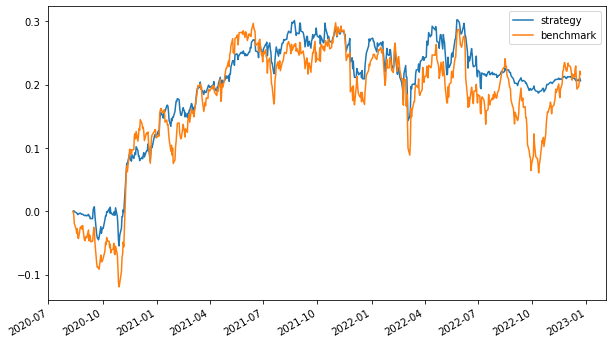

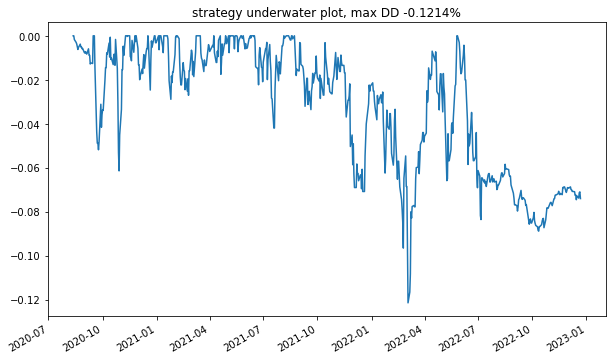

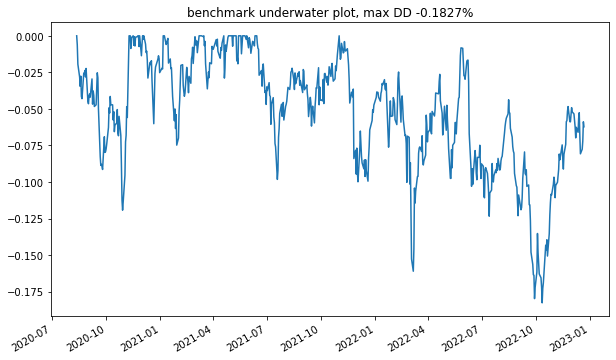

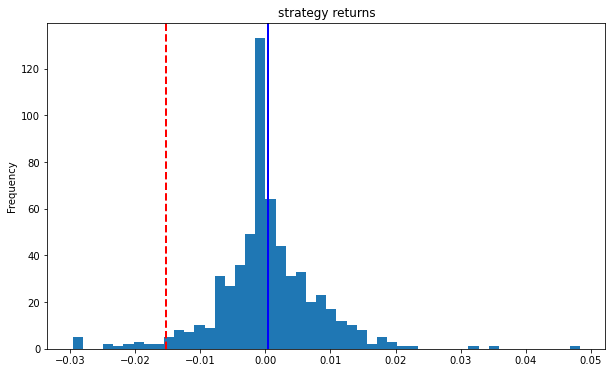

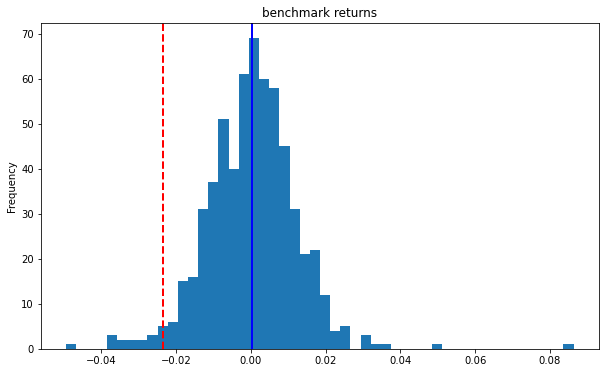

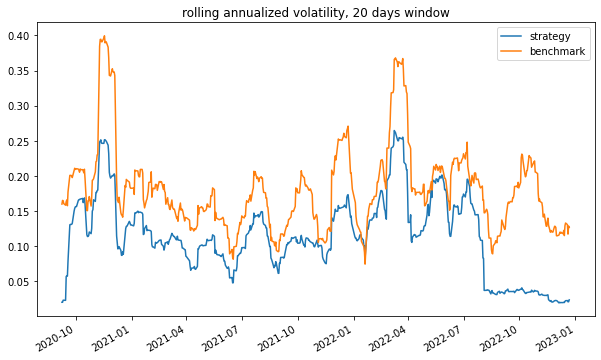

In [4]:
#instancia de la clase backtest
test = backtest(data=data,
 benchmark=benchmark,
 start_date='2020-07-01',
 end_date='2022-12-31',
 window=30,
 n_days= 10)


portfolio_returns = pd.Series([], dtype='float64')
for i in range(test.n_rebalances):
    
    #ventanas de datos
    calculation_window, invested_window = test.window_data(i)

    #calcular ponderaciones con HRP
    weights = HRP(calculation_window).getHRP()

    #calcular metricas del portfolio
    partial_returns = test.portfolio_returns(invested_window, weights)
    portfolio_returns = pd.concat([portfolio_returns, partial_returns])

test.report(portfolio_returns)
